## to do ...

### Arima/

### Is Data Stationary?

# Import Packages and Load Data

In [6]:
# colab only
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import datetime as dt

In [4]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [5]:
# Right after importing seaborn (could also use 'whitegrid')
sns.set_theme(style='whitegrid', context='talk')

In [6]:
# import simple clean data
df_simple = pd.read_csv('data/data_simple_clean.csv', index_col=0)
df_simple.head()

,Period,Commodity,Value_$,Quantity_kg
0,2017-11-01,"1605.30.10 - lobster, prepared or preserved, f...",26950137,619951
1,2019-12-01,"1605.30.10 - lobster, prepared or preserved, f...",42537812,863326
2,2021-01-01,"1605.30.10 - lobster, prepared or preserved, f...",24817872,562014
3,2021-03-01,"1605.30.10 - lobster, prepared or preserved, f...",8205605,148908
4,2021-09-01,"1605.30.10 - lobster, prepared or preserved, f...",74046708,1091663


In [7]:
df_full = pd.read_csv('data/data_full_clean.csv', index_col=0)
df_full.head()

,Period,Commodity,Province,Country,State,Value_$,Quantity_kg,Unit of measure
0,2017-05-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2454203,42059,Weight in kilograms
1,2018-06-01,"1605.30.10 - lobster, prepared or preserved, f...",Newfoundland and Labrador,United States,Massachusetts,2199419,48158,Weight in kilograms
2,2014-06-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,1299983,38486,Weight in kilograms
3,2014-10-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,151542,3475,Weight in kilograms
4,2014-11-01,"1605.30.11 - lobster meat, frozen, cooked by s...",Newfoundland and Labrador,United States,Massachusetts,634072,22628,Weight in kilograms


# Facebook Prophet

In [8]:
# 
df_full['Period'] = pd.to_datetime(df_full['Period'])

In [9]:
df_full.dtypes

Period             datetime64[ns]
Commodity                  object
Province                   object
Country                    object
State                      object
Value_$                     int64
Quantity_kg                 int64
Unit of measure            object
dtype: object

In [10]:
# drop commodity column
df_simple = df_simple.drop(columns=['Commodity'])

In [11]:
# group by to have total values by month year
df_simple = df_simple.groupby('Period', as_index=False).sum()
df_simple

,Period,Value_$,Quantity_kg
0,1988-01-01,21197107,1797439
1,1988-02-01,16588066,1274276
2,1988-03-01,19812354,1586821
3,1988-04-01,16143080,1553369
4,1988-05-01,42242858,3957311
...,...,...,...
424,2023-05-01,299398613,11446738
425,2023-06-01,473552801,14670111
426,2023-07-01,292203709,8191749
427,2023-08-01,233600838,6647827


In [12]:
df_value = df_simple[['Period','Value_$']].copy()
df_value

,Period,Value_$
0,1988-01-01,21197107
1,1988-02-01,16588066
2,1988-03-01,19812354
3,1988-04-01,16143080
4,1988-05-01,42242858
...,...,...
424,2023-05-01,299398613
425,2023-06-01,473552801
426,2023-07-01,292203709
427,2023-08-01,233600838


In [13]:
df_quantity = df_simple[['Period','Quantity_kg']].copy()
df_quantity

,Period,Quantity_kg
0,1988-01-01,1797439
1,1988-02-01,1274276
2,1988-03-01,1586821
3,1988-04-01,1553369
4,1988-05-01,3957311
...,...,...
424,2023-05-01,11446738
425,2023-06-01,14670111
426,2023-07-01,8191749
427,2023-08-01,6647827


## Model 1 with FB Prophet -Value($) with simple data

In [14]:
def prophet_prep(df_name):
    df_name = df_name.rename(columns={ df_name.columns[0]: "ds" , df_name.columns[1]:'y'})
    df_name['ds'] = pd.to_datetime(df_name['ds'])
    return df_name

In [15]:
df_simple['Period'] = pd.to_datetime(df_simple['Period'])


In [16]:
m = Prophet()

In [17]:
m.fit(df_value)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [16]:
future = m.make_future_dataframe(periods = 60, freq="MS")

Exception: Model has not been fit.

In [17]:
future.tail(10)

NameError: name 'future' is not defined

In [18]:
forecast = m.predict(future)
fig = m.plot(forecast)

NameError: name 'future' is not defined

In [19]:
m.plot_components(forecast)

NameError: name 'forecast' is not defined

In [20]:
# interpretation? 
# seasonality? 
# how long should forecast window be?

## Model 2 FB Prophet with df_simple Value and quantity

In [19]:
df_simple

,Period,Value_$,Quantity_kg
0,1988-01-01,21197107,1797439
1,1988-02-01,16588066,1274276
2,1988-03-01,19812354,1586821
3,1988-04-01,16143080,1553369
4,1988-05-01,42242858,3957311
...,...,...,...
424,2023-05-01,299398613,11446738
425,2023-06-01,473552801,14670111
426,2023-07-01,292203709,8191749
427,2023-08-01,233600838,6647827


In [20]:
## 

df_simple = df_simple.rename(columns={ df_simple.columns[0]: "ds" , df_simple.columns[1]:'y', df_simple.columns[2]:'quantity_kg'})
df_simple

,ds,y,quantity_kg
0,1988-01-01,21197107,1797439
1,1988-02-01,16588066,1274276
2,1988-03-01,19812354,1586821
3,1988-04-01,16143080,1553369
4,1988-05-01,42242858,3957311
...,...,...,...
424,2023-05-01,299398613,11446738
425,2023-06-01,473552801,14670111
426,2023-07-01,292203709,8191749
427,2023-08-01,233600838,6647827


In [21]:
m = Prophet()

In [22]:
# regressor - additional features in df passing into model for training
m.add_regressor('quantity_kg')

In [23]:
m.fit(df_simple)

10:44:38 - cmdstanpy - INFO - Chain [1] start processing
10:44:38 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# predict 2 years, 24 months 
future = m.make_future_dataframe(periods = 24, freq="MS")

In [25]:
len(df_simple)

429

In [26]:
df_simple_tail = df_simple.sort_values(by='ds').reset_index(drop=True).tail(24)
df_simple_tail = df_simple_tail.iloc[:,-1]
df_simple_tail

405     6484241
406     6082272
407     9751786
408     7528603
409     5465581
410     4181104
411     3846165
412     9398555
413    16599103
414    11518401
415    10234934
416     8079623
417     6083256
418     5746809
419     9040041
420     9315981
421     5900774
422     5934760
423     3382583
424    11446738
425    14670111
426     8191749
427     6647827
428     6387298
Name: quantity_kg, dtype: int64

In [27]:
quantity_feat = pd.DataFrame(pd.concat([df_simple['quantity_kg'], df_simple_tail], axis = 0)).reset_index(drop = True)
quantity_feat

,quantity_kg
0,1797439
1,1274276
2,1586821
3,1553369
4,3957311
...,...
448,11446738
449,14670111
450,8191749
451,6647827


In [28]:
type(df_simple_tail)

pandas.core.series.Series

In [29]:
# type(quantity_feat)
type(future)

pandas.core.frame.DataFrame

In [30]:
df_pred = pd.concat([future, quantity_feat], axis = 1)
df_pred

,ds,quantity_kg
0,1988-01-01,1797439
1,1988-02-01,1274276
2,1988-03-01,1586821
3,1988-04-01,1553369
4,1988-05-01,3957311
...,...,...
448,2025-05-01,11446738
449,2025-06-01,14670111
450,2025-07-01,8191749
451,2025-08-01,6647827


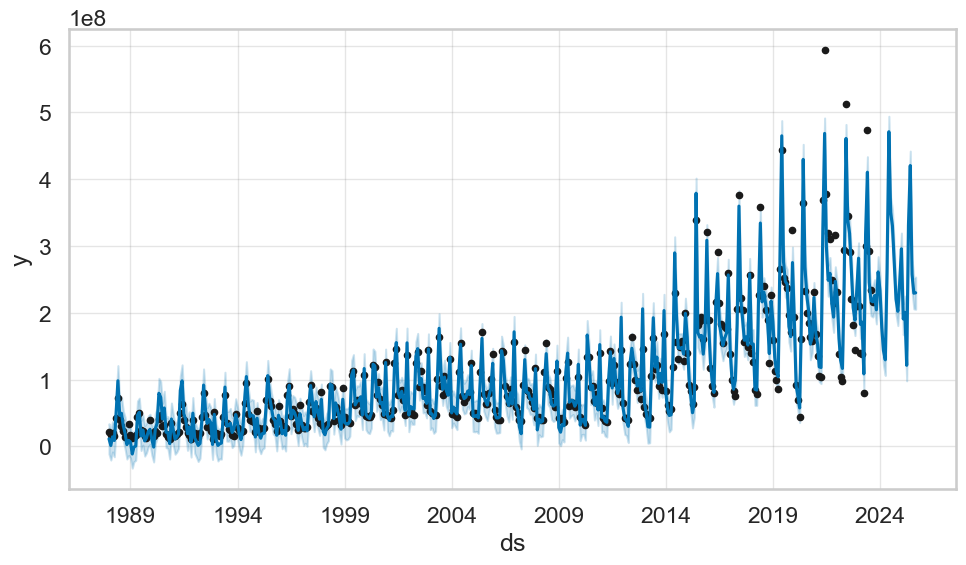

In [31]:
forecast = m.predict(df_pred)
fig = m.plot(forecast)

In [32]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,quantity_kg,quantity_kg_lower,quantity_kg_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1988-01-01,9.033847e+07,-1.130315e+07,3.403600e+07,9.033847e+07,9.033847e+07,-7.891036e+07,-7.891036e+07,-7.891036e+07,-7.940421e+07,...,-7.940421e+07,-7.940421e+07,-7.940421e+07,4.938544e+05,4.938544e+05,4.938544e+05,0.0,0.0,0.0,1.142811e+07
1,1988-02-01,9.041684e+07,-2.040071e+07,2.477903e+07,9.041684e+07,9.041684e+07,-8.900169e+07,-8.900169e+07,-8.900169e+07,-9.502456e+07,...,-9.502456e+07,-9.502456e+07,-9.502456e+07,6.022872e+06,6.022872e+06,6.022872e+06,0.0,0.0,0.0,1.415159e+06
2,1988-03-01,9.049016e+07,-8.208262e+06,3.720560e+07,9.049016e+07,9.049016e+07,-7.616279e+07,-7.616279e+07,-7.616279e+07,-8.569274e+07,...,-8.569274e+07,-8.569274e+07,-8.569274e+07,9.529953e+06,9.529953e+06,9.529953e+06,0.0,0.0,0.0,1.432737e+07
3,1988-04-01,9.056854e+07,-1.545994e+07,3.281320e+07,9.056854e+07,9.056854e+07,-8.160344e+07,-8.160344e+07,-8.160344e+07,-8.669153e+07,...,-8.669153e+07,-8.669153e+07,-8.669153e+07,5.088096e+06,5.088096e+06,5.088096e+06,0.0,0.0,0.0,8.965097e+06
4,1988-05-01,9.064438e+07,2.703347e+07,7.144152e+07,9.064438e+07,9.064438e+07,-4.136208e+07,-4.136208e+07,-4.136208e+07,-1.491581e+07,...,-1.491581e+07,-1.491581e+07,-1.491581e+07,-2.644628e+07,-2.644628e+07,-2.644628e+07,0.0,0.0,0.0,4.928230e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2025-05-01,1.492907e+08,3.083804e+08,3.538108e+08,1.484202e+08,1.500610e+08,1.816183e+08,1.816183e+08,1.816183e+08,2.086999e+08,...,2.086999e+08,2.086999e+08,2.086999e+08,-2.708159e+07,-2.708159e+07,-2.708159e+07,0.0,0.0,0.0,3.309090e+08
449,2025-06-01,1.498036e+08,3.981337e+08,4.420295e+08,1.488396e+08,1.506418e+08,2.706299e+08,2.706299e+08,2.706299e+08,3.049418e+08,...,3.049418e+08,3.049418e+08,3.049418e+08,-3.431185e+07,-3.431185e+07,-3.431185e+07,0.0,0.0,0.0,4.204335e+08
450,2025-07-01,1.502998e+08,2.327698e+08,2.804866e+08,1.492340e+08,1.512091e+08,1.071778e+08,1.071778e+08,1.071778e+08,1.115140e+08,...,1.115140e+08,1.115140e+08,1.115140e+08,-4.336133e+06,-4.336133e+06,-4.336133e+06,0.0,0.0,0.0,2.574777e+08
451,2025-08-01,1.508126e+08,2.058914e+08,2.518687e+08,1.496737e+08,1.517996e+08,7.852110e+07,7.852110e+07,7.852110e+07,6.541631e+07,...,6.541631e+07,6.541631e+07,6.541631e+07,1.310479e+07,1.310479e+07,1.310479e+07,0.0,0.0,0.0,2.293337e+08


In [33]:
# yhat actual predicted target value
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
448,2025-05-01,3.309090e+08,3.083804e+08,3.538108e+08
449,2025-06-01,4.204335e+08,3.981337e+08,4.420295e+08
450,2025-07-01,2.574777e+08,2.327698e+08,2.804866e+08
451,2025-08-01,2.293337e+08,2.058914e+08,2.518687e+08
452,2025-09-01,2.299432e+08,2.053152e+08,2.534825e+08


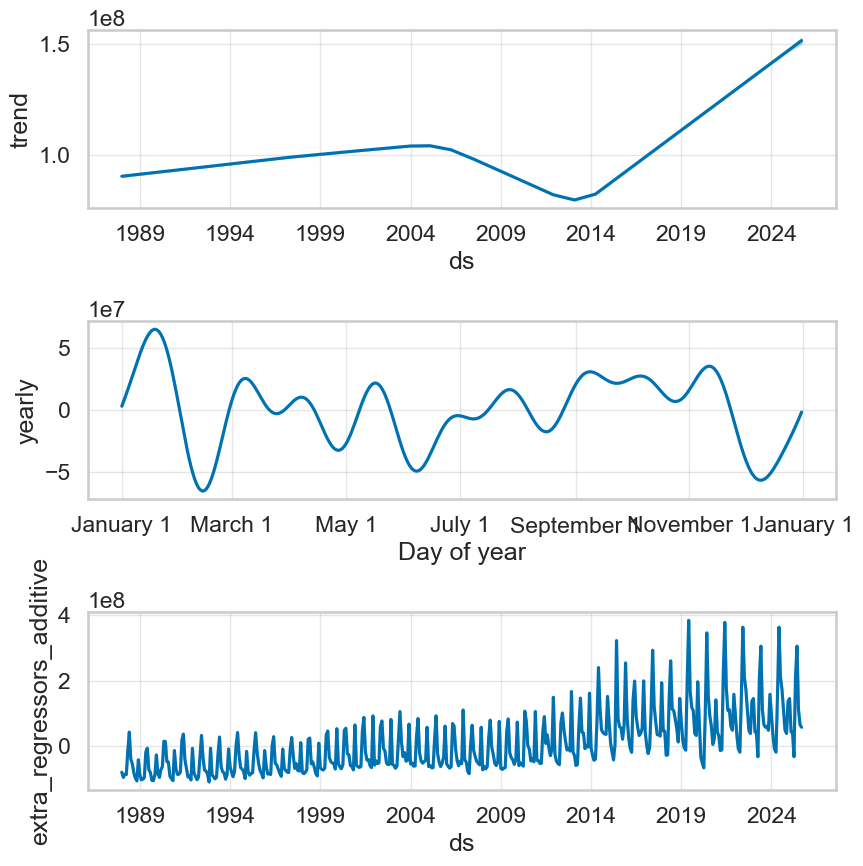

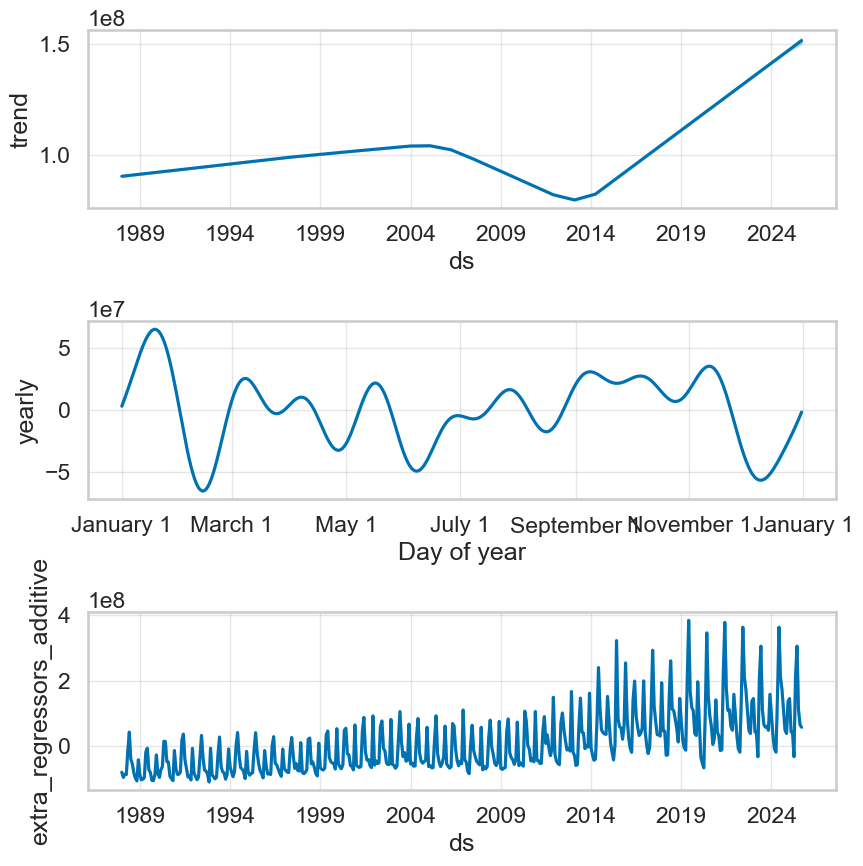

In [34]:
m.plot_components(forecast)